In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from skimage import io
from skimage.filters import meijering, apply_hysteresis_threshold, gaussian, median
from skimage.morphology import binary_closing, disk, remove_small_objects, skeletonize
from skan import Skeleton, summarize
import warnings
warnings.filterwarnings('ignore')

In [ ]:
matplotlib.rcParams['figure.labelsize']= 20
matplotlib.rcParams['axes.titlesize']= 20

In [ ]:
# test image
image = io.imread('../exp-data/20251004/40V_10X/2.00 s.tif', as_gray=True)

if image.dtype!= 'float':
    image = image.astype(float) / 255.0

In [ ]:
denoised_image = median(image, footprint=np.ones((3,3)))

ridge_map = meijering(denoised_image, sigmas=range(1, 4, 1), black_ridges=True)

binary_ridge_map = apply_hysteresis_threshold(ridge_map, low=0.08, high=0.2)

closed_map = binary_closing(binary_ridge_map, footprint=disk((3)))

cleaned_map = remove_small_objects(closed_map, min_size=16)

skleton = skeletonize(cleaned_map)

skeleton_obj = Skeleton(skleton)
summary_df  = summarize(skeleton_obj)
total_length = summary_df['branch-distance'].sum()
print(total_length)

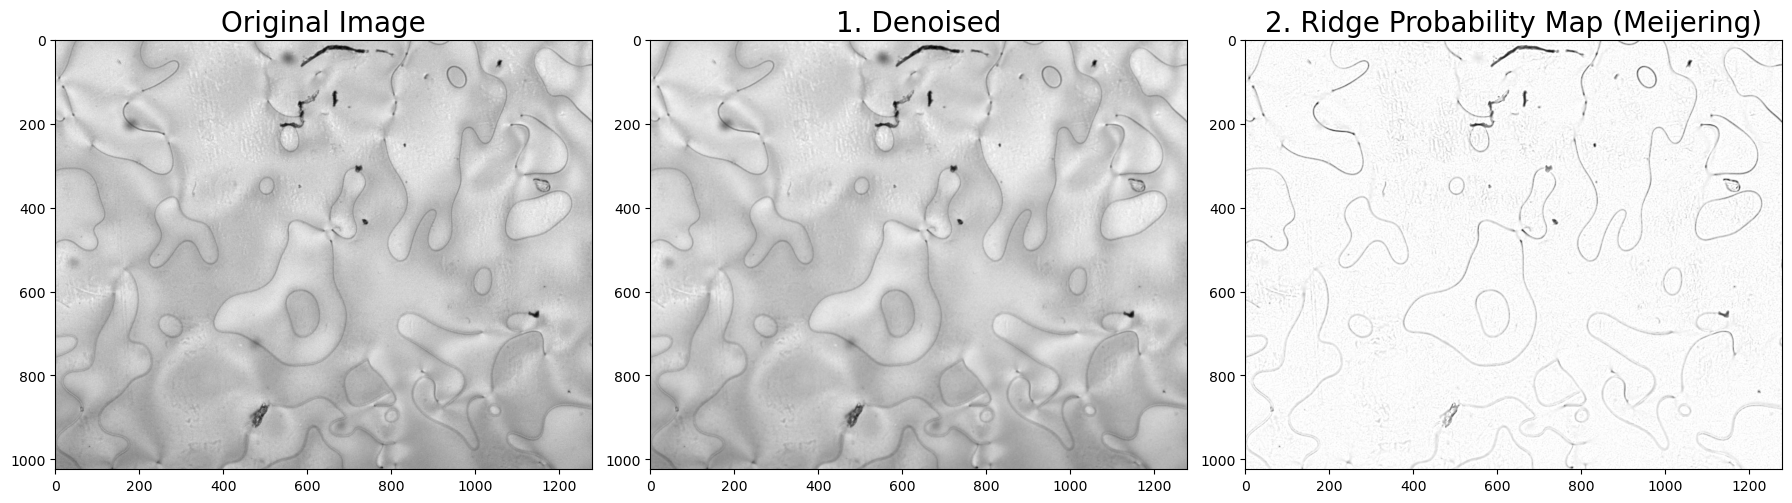

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ax = axes.flatten()
plt.tight_layout()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')

ax[1].imshow(denoised_image, cmap='gray')
ax[1].set_title('1. Denoised')

ax[2].imshow(ridge_map, cmap='binary')
ax[2].set_title('2. Ridge Probability Map (Meijering)')

plt.savefig('../figs/test-framework-2s_40V-S012.png')

# ax[3].imshow(binary_ridge_map, cmap='gray')
# ax[3].set_title('3. Hysteresis Threshold')


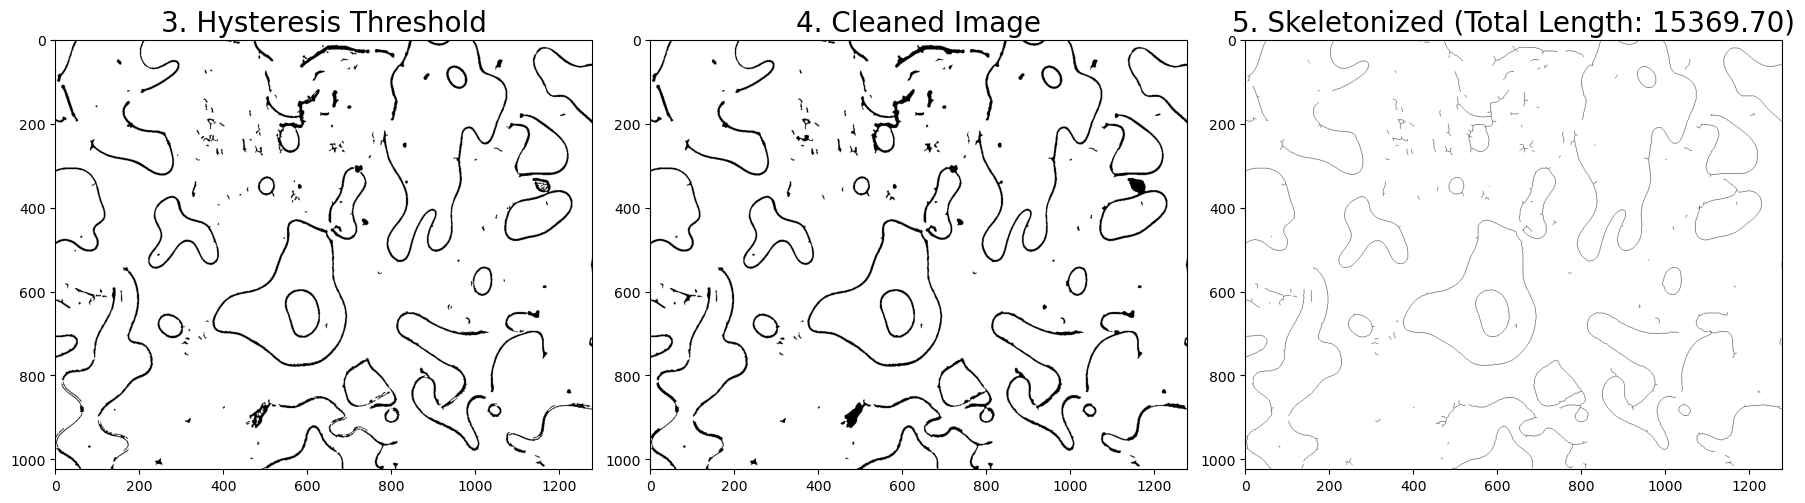

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ax = axes.flatten()
plt.tight_layout()

ax[0].imshow(binary_ridge_map, cmap='binary')
ax[0].set_title('3. Hysteresis Threshold')


ax[1].imshow(cleaned_map, cmap='binary')
ax[1].set_title('4. Cleaned Image')


ax[2].imshow(skleton, cmap='binary')
ax[2].set_title(f'5. Skeletonized (Total Length: {total_length:.2f})')

plt.savefig('../figs/test-framework-2s_40V-S345.png')
plt.show()